In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fare_df = pd.read_csv('C:/Users/15705/Downloads/group_project_2-main/group_project_2-main/Resources/Average Yearly Fares.csv')

In [3]:
airport_codes = ['LAX', 'ORD', 'ATL', 'DEN', 'EWR', 'SEA', 'DFW', 'PHX', 'MCO', 'BOS']

# replace the first column with airport codes
fare_df.index = airport_codes

In [4]:
fare_df_clean = fare_df.drop(columns=['Unnamed: 0'])
fare_df_clean

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
LAX,352.99,336.82,342.60,338.08,319.71,339.33,360.48,370.01,389.39,343.06,...,401.84,411.92,422.89,398.62,355.90,352.52,352.79,356.56,291.59,322.20
ORD,409.26,374.32,338.23,339.96,320.58,313.59,330.82,326.17,361.46,328.70,...,385.05,400.51,415.75,359.19,317.98,317.14,338.55,344.89,276.92,284.93
ATL,339.23,328.77,305.63,304.49,294.35,312.56,350.75,357.78,351.23,314.81,...,365.82,397.86,424.95,390.24,350.96,350.91,360.85,370.49,299.23,303.74
DEN,434.58,412.28,366.38,341.96,325.26,340.28,324.20,316.79,325.86,285.46,...,320.91,327.21,336.73,326.65,311.95,298.97,302.55,300.48,252.89,271.37
EWR,449.52,421.09,399.04,407.35,389.71,385.84,379.69,379.98,428.99,385.01,...,477.06,487.50,492.22,472.14,429.75,401.20,403.74,407.21,305.94,313.97
SEA,336.56,319.69,311.93,320.81,316.60,328.96,353.61,354.13,353.61,314.31,...,382.80,380.51,379.42,367.00,332.40,335.44,337.31,336.51,287.04,308.81
DFW,441.85,413.06,386.03,393.59,369.48,368.89,389.36,364.99,406.16,365.37,...,430.71,415.66,425.24,383.25,348.99,362.79,383.43,402.57,323.76,319.66
PHX,267.64,250.89,248.33,251.06,250.33,269.04,284.35,283.19,305.19,279.15,...,331.83,348.40,359.32,349.17,327.14,327.12,338.57,348.77,280.89,292.23
MCO,279.28,265.63,267.78,263.16,241.75,240.57,256.71,253.00,260.03,232.82,...,278.43,294.75,312.40,291.16,253.87,249.33,249.74,251.75,215.74,220.15
BOS,406.26,381.50,355.47,362.09,316.34,315.68,339.13,354.64,391.30,328.50,...,371.25,373.46,381.96,377.74,349.34,335.98,328.21,337.73,290.54,329.44


In [5]:
fuel_df = pd.read_csv('C:/Users/15705/Downloads/group_project_2-main/group_project_2-main/Resources/fuel_prices_since_2000.csv')

In [6]:
# Convert the "date" column to a datetime format
fuel_df['date'] = pd.to_datetime(fuel_df['date'])
fuel_df.set_index('date', inplace=True)

# Resample the dataframe to get the monthly average
monthly_avg = fuel_df.resample('M').mean()

# Reset the index of the dataframe
monthly_avg = monthly_avg.reset_index()

monthly_avg

,date,Unnamed: 0,price ($/Gal)
0,2000-01-31,5807.0,0.780684
1,2000-02-29,5787.5,0.779650
2,2000-03-31,5766.0,0.771000
3,2000-04-30,5745.0,0.719211
4,2000-05-31,5724.5,0.761500
...,...,...,...
274,2022-11-30,78.5,3.160350
275,2022-12-31,58.0,2.896762
276,2023-01-31,37.5,3.541700
277,2023-02-28,18.0,2.789737


In [7]:
# Convert the date column to datetime format
monthly_avg['date'] = pd.to_datetime(monthly_avg['date'])

# Extract the year from the date column and create a new column
monthly_avg['year'] = monthly_avg['date'].dt.year

# Group the data by year and take the mean of the columns
yearly_avg = monthly_avg.groupby('year').mean()

# Print the resulting dataframe
print(yearly_avg)

       Unnamed: 0  price ($/Gal)
year                            
2000  5692.250000       0.848687
2001  5441.166667       0.723623
2002  5192.000000       0.685433
2003  4941.750000       0.825729
2004  4692.958333       1.150064
2005  4442.708333       1.710381
2006  4192.291667       1.920875
2007  3942.000000       2.130236
2008  3689.791667       2.961749
2009  3437.916667       1.659357
2010  3187.125000       2.146679
2011  2934.500000       2.996058
2012  2682.083333       3.056500
2013  2430.416667       2.923422
2014  2178.583333       2.696611
2015  1926.916667       1.525074
2016  1674.666667       1.247938
2017  1423.166667       1.560227
2018  1172.291667       2.019694
2019   924.041667       1.878096
2020   674.083333       1.101123
2021   423.375000       1.854398
2022   172.375000       3.367415
2023    19.833333       3.064368


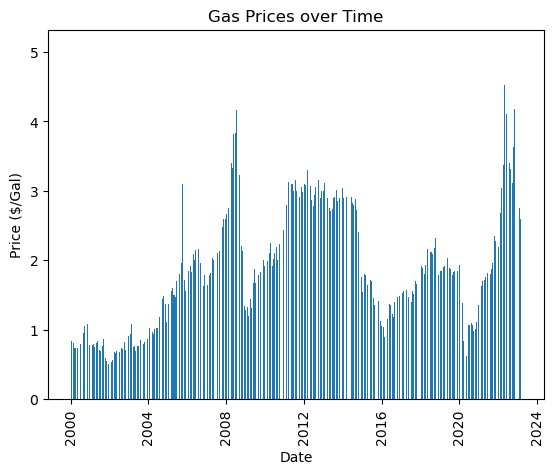

In [8]:
fuel_df = fuel_df.reset_index()

# select the date and price columns of the fuel_df DataFrame
x = fuel_df['date']
height = fuel_df['price ($/Gal)']

# create a bar chart
plt.bar(x, height)

# add labels and title
plt.xlabel('Date')
plt.ylabel('Price ($/Gal)')
plt.title('Gas Prices over Time')

# rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# show the chart
plt.show()

In [9]:
gas_prices = yearly_avg['price ($/Gal)']
gas_prices

year
2000    0.848687
2001    0.723623
2002    0.685433
2003    0.825729
2004    1.150064
2005    1.710381
2006    1.920875
2007    2.130236
2008    2.961749
2009    1.659357
2010    2.146679
2011    2.996058
2012    3.056500
2013    2.923422
2014    2.696611
2015    1.525074
2016    1.247938
2017    1.560227
2018    2.019694
2019    1.878096
2020    1.101123
2021    1.854398
2022    3.367415
2023    3.064368
Name: price ($/Gal), dtype: float64

In [10]:
fare_prices = fare_df

In [11]:
numeric_df = fare_df.select_dtypes(include='number')
avg_prices = numeric_df.mean()

# print the average prices
avg_prices

0     371.717
1     350.405
2     332.142
3     332.255
4     314.411
5     321.474
6     336.910
7     336.068
8     357.322
9     317.719
10    344.467
11    365.770
12    374.570
13    383.778
14    395.088
15    371.516
16    337.828
17    333.140
18    339.574
19    345.696
20    282.454
21    296.650
dtype: float64

In [12]:
# create the initial series
s = pd.Series([371.717, 350.405, 332.142, 332.142, 314.411, 321.474, 336.910, 336.068, 357.322, 317.719, 344.467, 365.770, 374.570, 383.778, 395.088, 371.516, 337.828, 333.140, 339.574, 345.696, 282.454, 296.650],
              index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])

# create a list of full years
years = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

# set the full years as the new index
s.index = years

# convert the series to a DataFrame
yearly_avg_prices_df = pd.DataFrame({'value': s})
yearly_avg_prices_df

,value
2000,371.717
2001,350.405
2002,332.142
2003,332.142
2004,314.411
2005,321.474
2006,336.910
2007,336.068
2008,357.322
2009,317.719


In [23]:
fare_prices_values = s.values
len(fare_prices_values)
gas_prices_values = gas_prices.values
len(gas_prices_values)

22

In [26]:
gas_prices_values = gas_prices.values
gas_prices_values = gas_prices_values[:-2]
print(len(gas_prices_values))

22


In [27]:
# Create a new DataFrame with two columns
combined_df = pd.DataFrame({
    'fare_prices': fare_prices_values,
    'gas_prices': gas_prices_values
})

# Print the resulting DataFrame
print(combined_df)

    fare_prices  gas_prices
0       371.717    0.848687
1       350.405    0.723623
2       332.142    0.685433
3       332.142    0.825729
4       314.411    1.150064
5       321.474    1.710381
6       336.910    1.920875
7       336.068    2.130236
8       357.322    2.961749
9       317.719    1.659357
10      344.467    2.146679
11      365.770    2.996058
12      374.570    3.056500
13      383.778    2.923422
14      395.088    2.696611
15      371.516    1.525074
16      337.828    1.247938
17      333.140    1.560227
18      339.574    2.019694
19      345.696    1.878096
20      282.454    1.101123
21      296.650    1.854398


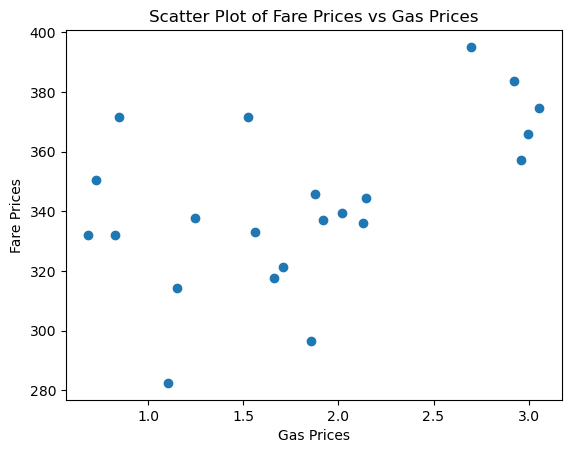

In [31]:

fare_prices = [371.717, 350.405, 332.142, 332.142, 314.411, 321.474, 336.910, 336.068, 357.322, 317.719, 344.467, 365.770, 374.570, 383.778, 395.088, 371.516, 337.828, 333.140, 339.574, 345.696, 282.454, 296.650]
gas_prices = [0.848687, 0.723623, 0.685433, 0.825729, 1.150064, 1.710381, 1.920875, 2.130236, 2.961749, 1.659357, 2.146679, 2.996058, 3.056500, 2.923422, 2.696611, 1.525074, 1.247938, 1.560227, 2.019694, 1.878096, 1.101123, 1.854398]

plt.scatter(gas_prices, fare_prices)
plt.xlabel('Gas Prices')
plt.ylabel('Fare Prices')
plt.title('Scatter Plot of Fare Prices vs Gas Prices')
plt.show()